In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/_kaggle/house/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/_kaggle/house/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
pd.set_option('display.max_rows', 200)      # 행도 200개까지, 필요시 더 크게!
pd.set_option('display.max_columns', 200)  # 숫자를 충분히 크게 조정, # 한 번만 실행해도, 노트북/세션 내에서는 계속 적용됩니다.

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(train_df.isna().sum()[train_df.isna().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# missing data 확인

In [7]:
def missing_summary(data):
    # 결측치(np.nan, None) 개수
    n_null = data.isnull().sum()
    # 문자열 'None', 'null', 'N/A', '' 개수 모두 합치기 (각 컬럼별로)
    n_str_none = (
        (data == 'None') |
        (data == 'null') |
        (data == 'N/A') |
        (data == '')
    ).sum()
    # 전체 결측치 개수(실제 결측치 + 문자열 결측치)
    total_missing = n_null + n_str_none
    # 결측치 비율(%)
    percent_missing = 100 * total_missing / len(data)
    # 컬럼별 데이터 타입
    dtypes = data.dtypes

    summary = pd.DataFrame({
        'Missing': total_missing,
        'Percent': percent_missing.round(2),
        'Type': dtypes
    })
    summary = summary.sort_values('Percent', ascending=False)
    return summary

missing_summary(data = train_df)
# print(missing_summary(train_df))

,Missing,Percent,Type
PoolQC,1453,99.52,object
MiscFeature,1406,96.30,object
Alley,1369,93.77,object
Fence,1179,80.75,object
MasVnrType,872,59.73,object
FireplaceQu,690,47.26,object
LotFrontage,259,17.74,float64
GarageQual,81,5.55,object
GarageFinish,81,5.55,object
GarageType,81,5.55,object


# X, y 분할 및 X 합치기

In [8]:
X = train_df.drop(['SalePrice', 'Id'], axis=1).copy()
y = train_df['SalePrice'].copy()

test_id = test_df['Id'].copy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1095, 79) (365, 79) (1095,) (365,)


In [10]:
X_train['data_split'] = 1
X_valid['data_split'] = 0
test_df['data_split'] = 2

df = pd.concat([X_train, X_valid, test_df], axis=0, ignore_index=False)

In [11]:
print(X_train.shape, X_valid.shape, test_df.shape, y_train.shape, y_valid.shape)

(1095, 80) (365, 80) (1459, 81) (1095,) (365,)


In [12]:
df.shape

(2919, 81)

# 결측치 처리 (hasNone 으로 없는 부분 채우기)

In [13]:
null_cols = ['Alley', 'MiscFeature', 'PoolQC', 'Fence', 'BsmtQual', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[null_cols] = df[null_cols].fillna('hasNone')

In [14]:
missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dtypes = df.dtypes.apply(lambda x: x.name)
missing_data = pd.concat([missing, percent, dtypes], axis=1, keys=['Missing', 'Percent', 'Type'])
missing_data.head(30)

,Missing,Percent,Type
MasVnrType,1766,0.605002,object
Id,1460,0.500171,float64
LotFrontage,486,0.166495,float64
GarageYrBlt,159,0.054471,float64
MasVnrArea,23,0.007879,float64
MSZoning,4,0.001370,object
Utilities,2,0.000685,object
Functional,2,0.000685,object
BsmtHalfBath,2,0.000685,float64
BsmtFullBath,2,0.000685,float64


In [15]:
missing_summary(data = df)

,Missing,Percent,Type
MasVnrType,1766,60.50,object
Id,1460,50.02,float64
LotFrontage,486,16.65,float64
GarageYrBlt,159,5.45,float64
MasVnrArea,23,0.79,float64
MSZoning,4,0.14,object
Utilities,2,0.07,object
Functional,2,0.07,object
BsmtHalfBath,2,0.07,float64
BsmtFullBath,2,0.07,float64


# 1차 drop

In [16]:
df = df.drop(columns=['MasVnrType', 'Id'], axis=1)

# y 분포 확인 및 정규화

*   y_train (즉, SalePrice)이 치우쳐져(skewed) 있다면, 모델링 전에 분포를 좀 정상화(normalize) 시켜주는 게 좋다.

*   특히 회귀 문제에서는 오른쪽 skew는 로그 변환 (log transform) 이 가장 흔하고 강력한 방법이다.

*   주택 가격, 매출, 소득 같은 데이터는 보통 오른쪽으로 긴 꼬리 (right-skewed) 형태이다. 이걸 그냥 쓰면 모델이 고가 영역에서 과대적합하거나 잔차가 치우칠 수 있다. log1p 변환 (log(1 + y))을 쓰면 분포가 훨씬 정규분포에 가까워지고, 모델이 상대적인 차이를 더 잘 학습한다.




μ (mean) = 181712.29,  σ (std dev) = 77919.48



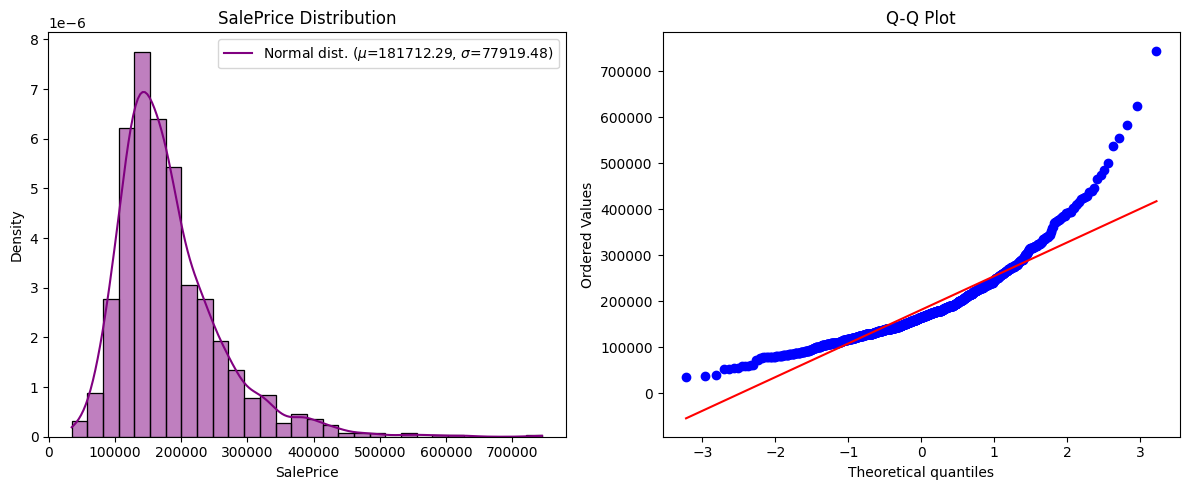

In [17]:
from scipy.stats import norm, probplot

# 평균, 표준편차 계산
mu, sigma = norm.fit(y_train)
print(f"\nμ (mean) = {mu:.2f},  σ (std dev) = {sigma:.2f}\n")

# 1행 2열 subplot 준비
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1️⃣ 히스토그램 + KDE
sns.histplot(y_train, kde=True, stat="density", bins=30, color='purple', ax=axes[0])
axes[0].legend([rf'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'], loc='best')
axes[0].set_ylabel('Density')
axes[0].set_title('SalePrice Distribution')

# 2️⃣ Q-Q plot
probplot(y_train, plot=axes[1])
axes[1].set_title('Q-Q Plot')

# 레이아웃 조정
plt.tight_layout()
plt.show()

fit할 때 주의!


*   학습할 때 → y_train_log 사용
*   예측 후 제출할 때 → np.expm1(y_pred)로 다시 복원 (exp(y) - 1)

예)

from sklearn.linear_model import Ridge

model = Ridge()

model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)

y_pred = np.expm1(y_pred_log)  # 원래 scale로 복원


In [18]:
y_train_log = np.log1p(y_train)
y_valid_log = np.log1p(y_valid)


[Log1p] μ (mean) = 12.03,  σ (std dev) = 0.39



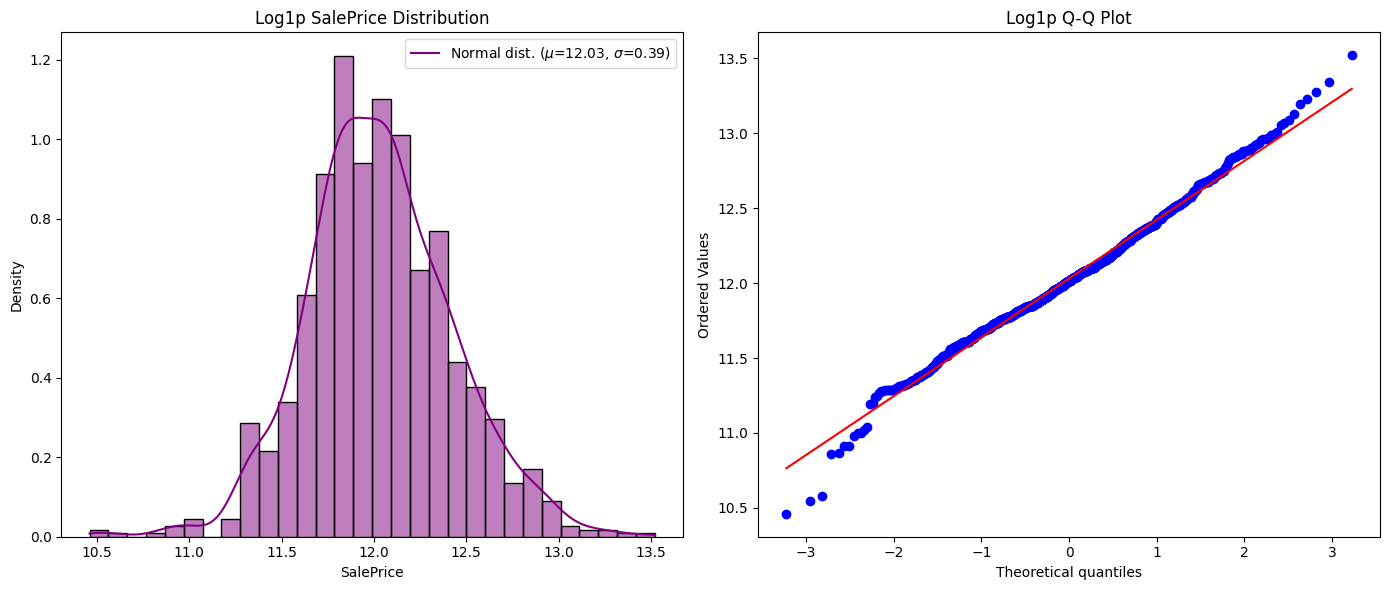

In [19]:
# 평균, 표준편차 계산
mu, sigma = norm.fit(y_train_log)
print(f"\n[Log1p] μ (mean) = {mu:.2f},  σ (std dev) = {sigma:.2f}\n")

# 1행 2열 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ 히스토그램 + KDE
sns.histplot(y_train_log, kde=True, stat="density", bins=30, color='purple', ax=axes[0])
axes[0].legend([rf'Normal dist. ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})'], loc='best')
axes[0].set_ylabel('Density')
axes[0].set_title('Log1p SalePrice Distribution')

# 2️⃣ Q-Q plot
probplot(y_train_log, plot=axes[1])
axes[1].set_title('Log1p Q-Q Plot')

plt.tight_layout()
plt.show()

#  LotFrontage 결측치 처리

In [20]:
df_train_temp = df[df['data_split'] == 1].copy()

# train에서 LotFrontage / LotArea 비율 계산
df_train_temp['FrontageAreaRatio'] = (df_train_temp['LotFrontage'] / df_train_temp['LotArea']).round(2)

# Neighborhood별 median 비율 계산
ratio_median = df_train_temp.groupby('Neighborhood')['FrontageAreaRatio'].median()

# 각 Neighborhood의 결측치 채우기 (두 자리 반올림)
for neigh, ratio in ratio_median.items():
    mask = (df['Neighborhood'] == neigh) & (df['LotFrontage'].isnull())
    df.loc[mask, 'LotFrontage'] = (df.loc[mask, 'LotArea'] * ratio).round(2)

# train 전체 median 비율로 남은 결측치 채우기 (혹시 Neighborhood 없는 rare case, 두 자리 반올림)
overall_ratio = df_train_temp['FrontageAreaRatio'].median()
df['LotFrontage'] = df['LotFrontage'].fillna((df['LotArea'] * overall_ratio).round(2))

print("LotFrontage filled (no leakage, rounded to 2 decimals)!")

LotFrontage filled (no leakage, rounded to 2 decimals)!


In [21]:
missing_summary(data = df)

,Missing,Percent,Type
GarageYrBlt,159,5.45,float64
MasVnrArea,23,0.79,float64
MSZoning,4,0.14,object
BsmtHalfBath,2,0.07,float64
BsmtFullBath,2,0.07,float64
Utilities,2,0.07,object
Functional,2,0.07,object
Exterior1st,1,0.03,object
BsmtFinSF2,1,0.03,float64
BsmtFinSF1,1,0.03,float64


In [22]:
df.tail(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,data_split
1439,80,RL,140.00,11080,Pave,hasNone,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1975,1975,Gable,CompShg,Plywood,Plywood,257.0,TA,TA,CBlock,TA,TA,Av,GLQ,576.0,Unf,0.0,552.0,1128.0,GasA,TA,Y,SBrkr,1210,0,0,1210,1.0,0.0,2,0,3,1,TA,6,Typ,0,hasNone,Attchd,1975.0,Unf,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,hasNone,hasNone,hasNone,0,5,2006,WD,Normal,2
1440,20,RL,501.02,50102,Pave,hasNone,IR1,Low,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,6,5,1958,1958,Gable,Tar&Grv,Plywood,Plywood,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,909.0,Unf,0.0,723.0,1632.0,GasA,TA,Y,SBrkr,1650,0,0,1650,1.0,0.0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,2.0,518.0,TA,TA,Y,0,0,0,0,138,0,hasNone,hasNone,hasNone,0,3,2006,WD,Alloca,2
1441,20,RL,80.98,8098,Pave,hasNone,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,hasNone,Attchd,2000.0,Unf,2.0,470.0,TA,TA,Y,0,173,0,0,0,0,hasNone,hasNone,hasNone,0,10,2006,WD,Normal,2
1442,20,RL,95.00,13618,Pave,hasNone,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,198.0,Gd,TA,PConc,Ex,Gd,Av,GLQ,1350.0,Unf,0.0,378.0,1728.0,GasA,Ex,Y,SBrkr,1960,0,0,1960,1.0,0.0,2,0,3,1,Gd,8,Typ,2,Gd,Attchd,2005.0,Fin,3.0,714.0,TA,TA,Y,172,38,0,0,0,0,hasNone,hasNone,hasNone,0,11,2006,New,Partial,2
1443,20,RL,88.00,11577,Pave,hasNone,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,382.0,Ex,TA,PConc,Gd,TA,Gd,GLQ,1455.0,Unf,0.0,383.0,1838.0,GasA,Ex,Y,SBrkr,1838,0,0,1838,1.0,0.0,2,0,3,1,Ex,9,Typ,1,Gd,Attchd,2005.0,Fin,3.0,682.0,TA,TA,Y,161,225,0,0,0,0,hasNone,hasNone,hasNone,0,9,2006,New,Partial,2
1444,20,NaN,125.00,31250,Pave,hasNone,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,0.0,TA,Fa,CBlock,hasNone,hasNone,hasNone,hasNone,0.0,hasNone,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,hasNone,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,hasNone,hasNone,hasNone,0,5,2006,WD,Normal,2
1445,90,RM,78.00,7020,Pave,hasNone,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,Duplex,SFoyer,7,5,1997,1997,Gable,CompShg,MetalSd,MetalSd,200.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1243.0,Unf,0.0,45.0,1288.0,GasA,Gd,Y,SBrkr,1368,0,0,1368,2.0,0.0,2,0,2,2,TA,8,Typ,0,hasNone,Attchd,1997.0,Fin,4.0,784.0,TA,TA,Y,0,48,0,0,0,0,hasNone,hasNone,hasNone,0,11,2006,WD,Normal,2
1446,160,RM,41.00,2665,Pave,hasNone,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,5,6,1977,1977,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,264.0,264.0,GasA,TA,Y,SBrkr,616,688,0,1304,0.0,0.0,1,1,3,1,TA,5,Typ,1,TA,BuiltIn,1977.0,RFn,1.0,336.0,TA,TA,Y,141,0,0,0,0,0,hasNone,hasNone,hasNone,0,5,2006,WD,Normal,2
1447,20,RL,58.00,10172,Pave,hasNone,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1968,2003,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,CBlock,TA,TA,No,ALQ,441.0,Unf,0.0,423.0,864.0,GasA,Ex,Y,SBrkr,874,0,0,874,1.0,0.0,1,0,3,1,TA,5,Typ,0,hasNone,Attchd,1968.0,RFn,1.0,288.0,TA,TA,Y,0,120,0,0,0,0,hasNone,hasNone,hasN

In [23]:
# 차고 없는 집 → GarageYrBlt = 0 (숫자 0으로 채움)
df.loc[df['GarageType'] == 'hasNone', 'GarageYrBlt'] = 0

# 차고 있는데 GarageYrBlt NaN → YearBuilt로 대체
mask = (df['GarageType'] != 'hasNone') & (df['GarageYrBlt'].isnull())
df.loc[mask, 'GarageYrBlt'] = df.loc[mask, 'YearBuilt']

print("GarageYrBlt filled: 0 for no garage, YearBuilt for missing year!")

GarageYrBlt filled: 0 for no garage, YearBuilt for missing year!


In [24]:
missing_summary(data = df)

,Missing,Percent,Type
MasVnrArea,23,0.79,float64
MSZoning,4,0.14,object
Utilities,2,0.07,object
Functional,2,0.07,object
BsmtFullBath,2,0.07,float64
BsmtHalfBath,2,0.07,float64
GarageArea,1,0.03,float64
Exterior1st,1,0.03,object
Exterior2nd,1,0.03,object
BsmtFinSF1,1,0.03,float64


In [25]:
cols = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']

for col in cols:
    if col == 'GarageYrBlt':
        min_val = df[df[col] != 0][col].min()
        max_val = df[df[col] != 0][col].max()
    else:
        min_val = df[col].min()
        max_val = df[col].max()
    print(f"{col}: min = {min_val}, max = {max_val}")

for col in cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

GarageYrBlt: min = 1895.0, max = 2207.0
YearBuilt: min = 1872, max = 2010
YearRemodAdd: min = 1950, max = 2010
YrSold: min = 2006, max = 2010
GarageYrBlt: 104 unique values
YearBuilt: 118 unique values
YearRemodAdd: 61 unique values
YrSold: 5 unique values


In [26]:
df[cols].head(20)

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
1023,2005.0,2005,2006,2008
810,1974.0,1974,1999,2006
1384,1939.0,1939,1950,2009
626,1960.0,1960,1978,2007
813,1958.0,1958,1958,2007
839,1946.0,1946,1995,2008
370,2000.0,2000,2000,2006
54,1962.0,1955,1955,2007
534,2004.0,2004,2004,2006
785,1967.0,1967,1967,2009


In [27]:
for col in cols:
    if col == 'GarageYrBlt':
        df[col] = df[col].apply(lambda x: 0 if x == 0 else (int(x) // 10) * 10)
    else:
        df[col] = df[col].apply(lambda x: (int(x) // 10) * 10)

print("All year columns grouped by decade (floor to nearest 10)!")

All year columns grouped by decade (floor to nearest 10)!


In [28]:
# train 데이터만 추출
df_train = df[df['data_split'] == 1]

# 범주형 변수 채우기 (train 최빈값, mode)
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    mode_val = df_train[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

# 수치형 변수 채우기 (train median)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    median_val = df_train[col].median()
    df[col] = df[col].fillna(median_val)

print("All categorical filled with train mode, numerical filled with train median!")

All categorical filled with train mode, numerical filled with train median!


In [29]:
missing_summary(data = df)

,Missing,Percent,Type
MSSubClass,0,0.0,int64
MSZoning,0,0.0,object
LotFrontage,0,0.0,float64
LotArea,0,0.0,int64
Street,0,0.0,object
Alley,0,0.0,object
LotShape,0,0.0,object
LandContour,0,0.0,object
Utilities,0,0.0,object
LotConfig,0,0.0,object


In [30]:
df1 = df.copy()

# 범주형(categorical) 변수들 중에서, 하나의 값이 데이터의 ≥85% 이상을 차지하는 변수 제거

“거의 한 값만 있는 범주형 컬럼” → 정보가 거의 없음 → 모델링에서 쓸모 없거나 제거 후보

범주형 변수 중에서 하나의 값이 threshold% 이상 차지하는 컬럼을 찾는다.
Parameters:

*   df (pd.DataFrame): 분석할 데이터프레임
*   threshold (float): 비율 임계값 (기본 90)








In [31]:
def dominant_cols(dataframe, threshold=90):
    cat_cols = dataframe.select_dtypes(include=['object', 'category']).columns
    drop_cols = []

    for col in cat_cols:
        counts = dataframe[col].value_counts(normalize=True, dropna=True)
        if not counts.empty:
            top_category = counts.index[0]
            top_percent = counts.iloc[0] * 100  # 퍼센트로 환산
            if top_percent >= threshold:
                drop_cols.append({'column': col, 'top_category': top_category, 'top_percent': top_percent})

    result_df = pd.DataFrame(drop_cols)
    if not result_df.empty:
        result_df = result_df.sort_values('top_percent', ascending=False)
        print("💥 Columns to drop (≥{}% dominant):".format(threshold))
        print(result_df.to_string(index=False))

        # 삭제 실행
        cols_to_drop = result_df['column'].tolist()
        dataframe = dataframe.drop(columns=cols_to_drop)    # inplace=False (기본값) → 새로운 DataFrame 반환  # inplace=True → 원본에서 직접 수정
        print(f"\nDropped columns: {cols_to_drop}")
    else:
        print(f"No columns found with ≥ {threshold}% dominant category.")

    return dataframe

In [32]:
df1 = dominant_cols(df1, threshold=85)

💥 Columns to drop (≥85% dominant):
      column top_category  top_percent
   Utilities       AllPub    99.965742
      PoolQC      hasNone    99.657417
      Street         Pave    99.588900
  Condition2         Norm    98.972251
    RoofMatl      CompShg    98.526893
     Heating         GasA    98.458376
 MiscFeature      hasNone    96.402878
   LandSlope          Gtl    95.169579
  CentralAir            Y    93.285372
       Alley      hasNone    93.216855
  Functional          Typ    93.148338
  Electrical        SBrkr    91.538198
  GarageCond           TA    90.921548
  PavedDrive            Y    90.476190
 LandContour          Lvl    89.825283
    BsmtCond           TA    89.277150
  GarageQual           TA    89.208633
   ExterCond           TA    86.947585
    SaleType           WD    86.536485
  Condition1         Norm    86.022610
BsmtFinType2          Unf    85.405961

Dropped columns: ['Utilities', 'PoolQC', 'Street', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature', 'La

In [33]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,data_split
1023,120,RL,43.00,3182,Reg,Inside,Blmngtn,TwnhsE,1Story,7,5,2000,2000,Gable,VinylSd,VinylSd,14.0,Gd,PConc,Gd,No,GLQ,16.0,0.0,1330.0,1346.0,Ex,1504,0,0,1504,0.0,0.0,2,0,2,1,Gd,7,1,Gd,Attchd,2000,Fin,2.0,437.0,156,20,0,0,0,0,hasNone,0,5,2000,Normal,1
810,20,RL,78.00,10140,Reg,Inside,NWAmes,1Fam,1Story,6,6,1970,1990,Hip,HdBoard,HdBoard,99.0,TA,CBlock,TA,No,ALQ,663.0,377.0,0.0,1040.0,Fa,1309,0,0,1309,1.0,0.0,1,1,3,1,Gd,5,1,Fa,Attchd,1970,RFn,2.0,484.0,265,0,0,0,0,648,GdPrv,0,1,2000,Normal,1
1384,50,RL,60.00,9060,Reg,Inside,Edwards,1Fam,1.5Fin,6,5,1930,1950,Gable,WdShing,Wd Shng,0.0,TA,BrkTil,TA,Mn,Rec,204.0,0.0,356.0,560.0,TA,698,560,0,1258,0.0,0.0,1,0,2,1,TA,6,0,hasNone,Detchd,1930,Unf,1.0,280.0,0,0,0,0,0,0,MnPrv,0,10,2000,Normal,1
626,20,RL,123.42,12342,IR1,Inside,NAmes,1Fam,1Story,5,5,1960,1970,Hip,Wd Sdng,Wd Sdng,0.0,TA,CBlock,TA,No,Unf,0.0,0.0,978.0,978.0,TA,1422,0,0,1422,0.0,0.0,1,0,3,1,TA,6,1,TA,Attchd,1960,RFn,1.0,286.0,0,0,36,0,0,0,GdWo,600,8,2000,Normal,1
813,20,RL,75.00,9750,Reg,Inside,NAmes,1Fam,1Story,6,6,1950,1950,Gable,MetalSd,MetalSd,243.0,TA,CBlock,TA,No,Rec,608.0,0.0,834.0,1442.0,Gd,1442,0,0,1442,0.0,0.0,1,1,4,1,TA,7,0,hasNone,Attchd,1950,RFn,1.0,301.0,0,0,275,0,0,0,hasNone,500,4,2000,Normal,1


In [34]:
df1['FinishedBsmtRatio'] = ((df1['BsmtFinSF1'] + df1['BsmtFinSF2']) / df1['TotalBsmtSF']).round(2)     # 마감율
df1['UnfinishedBsmtRatio'] = (df1['BsmtUnfSF'] / df1['TotalBsmtSF']).round(2)

df1 = df1.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])

# 인코딩
✅ 순서가 의미 없는 명목형에는 LabelEncoder OK
⚠️ 순서형에는 map()이 더 안전

In [35]:
bsmt_quality_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'hasNone':0}

cols_to_map = ['BsmtQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'ExterQual']

for col in cols_to_map:
    unique_vals = sorted(df1[col].dropna().unique())
    print(f"{col} unique values: {unique_vals}")

BsmtQual unique values: ['Ex', 'Fa', 'Gd', 'TA', 'hasNone']
FireplaceQu unique values: ['Ex', 'Fa', 'Gd', 'Po', 'TA', 'hasNone']
KitchenQual unique values: ['Ex', 'Fa', 'Gd', 'TA']
HeatingQC unique values: ['Ex', 'Fa', 'Gd', 'Po', 'TA']
ExterQual unique values: ['Ex', 'Fa', 'Gd', 'TA']


In [36]:
for col in cols_to_map:
  df1[col] = df1[col].map(bsmt_quality_map)

In [37]:
df1['TotalBath'] = (df1['BsmtFullBath'] + df1['FullBath'] + 0.5 * (df1['BsmtHalfBath'] + df1['HalfBath']))
df1 = df1.drop(columns=['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath'])

In [38]:
df2 = df1.copy()

In [39]:
df2.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,data_split,FinishedBsmtRatio,UnfinishedBsmtRatio,TotalBath
1023,120,RL,43.00,3182,Reg,Inside,Blmngtn,TwnhsE,1Story,7,5,2000,2000,Gable,VinylSd,VinylSd,14.0,4,PConc,4,No,GLQ,1346.0,5,1504,0,0,1504,2,1,4,7,1,4,Attchd,2000,Fin,2.0,437.0,156,20,0,0,0,0,hasNone,0,5,2000,Normal,1,0.01,0.99,2.0
810,20,RL,78.00,10140,Reg,Inside,NWAmes,1Fam,1Story,6,6,1970,1990,Hip,HdBoard,HdBoard,99.0,3,CBlock,3,No,ALQ,1040.0,2,1309,0,0,1309,3,1,4,5,1,2,Attchd,1970,RFn,2.0,484.0,265,0,0,0,0,648,GdPrv,0,1,2000,Normal,1,1.00,0.00,2.5
1384,50,RL,60.00,9060,Reg,Inside,Edwards,1Fam,1.5Fin,6,5,1930,1950,Gable,WdShing,Wd Shng,0.0,3,BrkTil,3,Mn,Rec,560.0,3,698,560,0,1258,2,1,3,6,0,0,Detchd,1930,Unf,1.0,280.0,0,0,0,0,0,0,MnPrv,0,10,2000,Normal,1,0.36,0.64,1.0
626,20,RL,123.42,12342,IR1,Inside,NAmes,1Fam,1Story,5,5,1960,1970,Hip,Wd Sdng,Wd Sdng,0.0,3,CBlock,3,No,Unf,978.0,3,1422,0,0,1422,3,1,3,6,1,3,Attchd,1960,RFn,1.0,286.0,0,0,36,0,0,0,GdWo,600,8,2000,Normal,1,0.00,1.00,1.0
813,20,RL,75.00,9750,Reg,Inside,NAmes,1Fam,1Story,6,6,1950,1950,Gable,MetalSd,MetalSd,243.0,3,CBlock,3,No,Rec,1442.0,4,1442,0,0,1442,4,1,3,7,0,0,Attchd,1950,RFn,1.0,301.0,0,0,275,0,0,0,hasNone,500,4,2000,Normal,1,0.42,0.58,1.5
839,50,RL,70.00,11767,Reg,Inside,Edwards,1Fam,1.5Fin,5,6,1940,1990,Gable,MetalSd,MetalSd,0.0,3,CBlock,3,No,BLQ,768.0,5,768,432,0,1200,3,1,3,6,0,0,Detchd,1940,Unf,1.0,240.0,0,0,0,0,0,0,hasNone,0,5,2000,Normal,1,0.46,0.54,1.0
370,60,RL,81.21,8121,IR1,Inside,Gilbert,1Fam,2Story,6,5,2000,2000,Gable,VinylSd,VinylSd,0.0,3,PConc,4,No,Unf,953.0,5,953,711,0,1664,3,1,3,7,1,3,Attchd,2000,RFn,2.0,460.0,100,40,0,0,0,0,hasNone,0,1,2000,Normal,1,0.00,1.00,2.5
54,80,RL,60.00,7134,Reg,Inside,NAmes,1Fam,SLvl,5,5,1950,1950,Gable,MetalSd,MetalSd,0.0,3,CBlock,3,No,ALQ,384.0,3,1360,0,0,1360,3,1,3,6,1,3,Detchd,1960,Unf,2.0,572.0,0,50,0,0,0,0,MnPrv,0,2,2000,Normal,1,1.00,0.00,1.0
534,60,RL,74.00,9056,IR1,Inside,Gilbert,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,0.0,4,PConc,5,Av,Unf,707.0,5,707,707,0,1414,3,1,4,6,1,4,Attchd,2000,Fin,2.0,403.0,100,35,0,0,0,0,hasNone,0,10,2000,Normal,1,0.00,1.00,2.5
785,20,RL,97.90,9790,Reg,Inside,NWAmes,1Fam,1Story,6,5,1960,1960,Gable,BrkFace,Wd Sdng,0.0,3,CBlock,3,No,Rec,1372.0,3,1342,0,0,1342,3,1,3,7,1,4,Attchd,1960,Unf,2.0,457.0,0,0,0,0,197,0,hasNone,0,9,2000,Normal,1,0.64,0.36,2.0


# rare, 즉 < 0.5 인 카테고리들은 =Other 로 통합

In [40]:
def collapse_rare_categories_safe(dataframe, column, train_mask, threshold=5, extra_replace=None):
    # train에서 rare category 찾기
    train_values = df.loc[train_mask, column]
    rare_values = train_values.value_counts()
    rare_values = rare_values[rare_values < threshold].index.tolist()

    # train/test 전체에 적용 (train 기준 rare만 처리)
    df[column] = df[column].replace(rare_values, 'Other')

    # 강제 replace (있으면)
    if extra_replace:
        df2[column] = df2[column].replace(extra_replace, 'Other')

    print(f"'{column}' rare categories collapsed (train-based, safe).")

In [41]:
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
train_mask = df2['data_split'] == 1

for col in cat_cols:
    collapse_rare_categories_safe(df2, col, train_mask, threshold=5)

'MSZoning' rare categories collapsed (train-based, safe).
'LotShape' rare categories collapsed (train-based, safe).
'LotConfig' rare categories collapsed (train-based, safe).
'Neighborhood' rare categories collapsed (train-based, safe).
'BldgType' rare categories collapsed (train-based, safe).
'HouseStyle' rare categories collapsed (train-based, safe).
'RoofStyle' rare categories collapsed (train-based, safe).
'Exterior1st' rare categories collapsed (train-based, safe).
'Exterior2nd' rare categories collapsed (train-based, safe).
'Foundation' rare categories collapsed (train-based, safe).
'BsmtExposure' rare categories collapsed (train-based, safe).
'BsmtFinType1' rare categories collapsed (train-based, safe).
'GarageType' rare categories collapsed (train-based, safe).
'GarageFinish' rare categories collapsed (train-based, safe).
'Fence' rare categories collapsed (train-based, safe).
'SaleCondition' rare categories collapsed (train-based, safe).


In [42]:
# object_cols = df2.select_dtypes(include=['object']).columns

# for col in object_cols:
#     unique_vals = sorted(df2[col].dropna().unique())
#     count = df2[col].nunique(dropna=True)
#     print(f"{col}: {count} unique values → {unique_vals}")

object_cols = df2.select_dtypes(include=['object']).columns

for col in object_cols:
    print(f"\n{col} value counts:")
    print(df2[col].value_counts(dropna=True))


MSZoning value counts:
MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

LotShape value counts:
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64

LotConfig value counts:
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64

Neighborhood value counts:
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

BldgType value counts:
BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

HouseStyle value counts:
HouseStyle


# 남은 범주형 데이터를 CatBoostEncoder 적용 (y와의 평균 참조)

In [43]:
# !pip install category_encoders

In [44]:
import category_encoders as ce

# 범주형 컬럼 추출
cat_cols = df2.select_dtypes(include=['object', 'category']).columns

# train/test 구분 (data_split == 1 → train, == 2 → test)
train_mask = df2['data_split'] == 1
valid_mask = df2['data_split'] == 0
test_mask = df2['data_split'] == 2

df_train = df2.loc[train_mask].copy()
df_valid = df2.loc[valid_mask].copy()
df_test = df2.loc[test_mask].copy()

# CatBoostEncoder 초기화
cbe = ce.CatBoostEncoder()

# train으로 fit
cbe.fit(df_train[cat_cols], y_train_log)

# transform 적용 (train, test 각각)
df2.loc[train_mask, cat_cols] = cbe.transform(df_train[cat_cols]).round(2)
df2.loc[valid_mask, cat_cols] = cbe.transform(df_valid[cat_cols]).round(2)
df2.loc[test_mask, cat_cols] = cbe.transform(df_test[cat_cols]).round(2)

print("CatBoostEncoder done!")

CatBoostEncoder done!


In [45]:
df2.dtypes

,0
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
LotShape,object
LotConfig,object
Neighborhood,object
BldgType,object
HouseStyle,object
OverallQual,int64


In [46]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,data_split,FinishedBsmtRatio,UnfinishedBsmtRatio,TotalBath
1023,120,12.09,43.00,3182,11.95,12.01,12.14,12.08,12.0,7,5,2000,2000,11.99,12.21,12.21,14.0,4,12.26,4,11.96,12.3,1346.0,5,1504,0,0,1504,2,1,4,7,1,4,12.16,2000,12.31,2.0,437.0,156,20,0,0,0,0,12.06,0,5,2000,12.01,1,0.01,0.99,2.0
810,20,12.09,78.00,10140,11.95,12.01,12.13,12.05,12.0,6,6,1970,1990,12.18,11.94,11.96,99.0,3,11.88,3,11.96,11.95,1040.0,2,1309,0,0,1309,3,1,4,5,1,2,12.16,1970,12.18,2.0,484.0,265,0,0,0,0,648,12.07,0,1,2000,12.01,1,1.00,0.00,2.5
1384,50,12.09,60.00,9060,11.95,12.01,11.72,12.05,11.81,6,5,1930,1950,11.99,11.83,11.88,0.0,3,11.76,3,12.11,11.86,560.0,3,698,560,0,1258,2,1,3,6,0,0,11.78,1930,11.83,1.0,280.0,0,0,0,0,0,0,11.88,0,10,2000,12.01,1,0.36,0.64,1.0
626,20,12.09,123.42,12342,12.15,12.01,11.88,12.05,12.0,5,5,1960,1970,12.18,11.84,11.85,0.0,3,11.88,3,11.96,11.99,978.0,3,1422,0,0,1422,3,1,3,6,1,3,12.16,1960,12.18,1.0,286.0,0,0,36,0,0,0,11.77,600,8,2000,12.01,1,0.00,1.00,1.0
813,20,12.09,75.00,9750,11.95,12.01,11.88,12.05,12.0,6,6,1950,1950,11.99,11.86,11.87,243.0,3,11.88,3,11.96,11.86,1442.0,4,1442,0,0,1442,4,1,3,7,0,0,12.16,1950,12.18,1.0,301.0,0,0,275,0,0,0,12.06,500,4,2000,12.01,1,0.42,0.58,1.5


In [47]:
df2[cat_cols] = df2[cat_cols].astype(float)

In [48]:
df3 = df2.copy()

# 변수들 skew 확인

In [49]:
from scipy.stats import skew
from scipy.special import boxcox1p

# 숫자형 컬럼만 추출
numeric_feats = df3.select_dtypes(include=['number']).columns

train_mask = df3['data_split'] == 1
valid_mask = df3['data_split'] == 0
test_mask  = df3['data_split'] == 2

# 왜도 계산 및 정렬 (각 숫자형 컬럼의 왜도(skewness) 를 수치로 계산)
skewed_feats = df3.loc[train_mask, numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# 절대값 0.75 이상만 추출 (1번에서 구한 skew 값 중에서 절대값이 0.75 이상인 컬럼만 셀렉)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness = skewness[abs(skewness['Skew']) > 0.75]
print(f"\nThere are {skewness.shape[0]} skewed numerical features to Box-Cox transform.\n")
print(skewness)

# Box-Cox 변환 ((x+1)^𝜆 방식으로 값 분포를 정규분포에 가깝게 만듦)
lam = 0.2
for feat in skewness.index:
    df3.loc[train_mask, feat] = boxcox1p(df3.loc[train_mask, feat], lam) # 변환 후 df3에 덮어쓰기 완료
    df3.loc[valid_mask, feat] = boxcox1p(df3.loc[valid_mask, feat], lam)
    df3.loc[test_mask, feat]  = boxcox1p(df3.loc[test_mask, feat], lam)
print("\nBox-Cox transform applied to skewed numerical features (abs(skew) > 0.75)")

/tmp/ipython-input-49-2884068602.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = df3.loc[train_mask, numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
/tmp/ipython-input-49-2884068602.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[train_mask, feat] = boxcox1p(df3.loc[train_mask, feat], lam) # 변환 후 df3에 덮어쓰기 완료
/tmp/ipython-input-49-2884068602.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.         13.25655979  0.         ...  0.          0.
  0.        ]' has dtype incompatible with int64, please explicitly cast to 


There are 29 skewed numerical features to Box-Cox transform.

                    Skew
MiscVal        17.116358
PoolArea       13.914346
LotFrontage    13.266303
LotArea        11.690665
3SsnPorch       9.721204
LowQualFinSF    9.069413
KitchenAbvGr    4.393320
ScreenPorch     4.030957
EnclosedPorch   3.269467
LotConfig       3.210876
YrSold          2.371057
MasVnrArea      2.246587
OpenPorchSF     2.234466
SaleCondition   2.048333
TotalBsmtSF     1.772881
WoodDeckSF      1.600544
1stFlrSF        1.460996
GrLivArea       1.452852
MSSubClass      1.421964
RoofStyle       1.340777
ExterQual       0.830452
LotShape        0.810571
2ndFlrSF        0.797764
GarageType     -0.844020
BsmtQual       -1.247479
MSZoning       -1.604966
Fence          -2.151414
BldgType       -2.916097
GarageYrBlt    -3.972640

Box-Cox transform applied to skewed numerical features (abs(skew) > 0.75)


/tmp/ipython-input-49-2884068602.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[16.60117147 16.00991346 13.5295742  ... 14.33629334 14.54628199
 16.74562642]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[train_mask, feat] = boxcox1p(df3.loc[train_mask, feat], lam) # 변환 후 df3에 덮어쓰기 완료
/tmp/ipython-input-49-2884068602.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[16.60117147 16.00991346 15.84371615 ... 14.33629334 16.37247408
 16.74562642]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[train_mask, feat] = boxcox1p(df3.loc[train_mask, feat], lam) # 변환 후 df3에 덮어쓰기 완료
/tmp/ipython-input-49-2884068602.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ver

In [50]:
skewed_feats = df3[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
print(skewed_feats.head(20))


Skew in numerical features: 

PoolArea         15.174570
3SsnPorch         8.971282
LowQualFinSF      8.828579
MiscVal           5.840073
KitchenAbvGr      3.751552
LotConfig         3.554575
ScreenPorch       2.994122
YrSold            2.396250
EnclosedPorch     2.054692
SaleCondition     1.956222
RoofStyle         1.484342
LotShape          0.837972
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
MasVnrArea        0.682246
OverallCond       0.570312
ExterQual         0.557831
LotArea           0.496692
TotalBath         0.492247
LotFrontage       0.470061
dtype: float64


In [51]:
print(df3.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'data_split', 'FinishedBsmtRatio',
       'UnfinishedBsmtRatio', 'TotalBath'],
      dtype='object')


In [52]:
# binarize 대상 컬럼 목록
cols_to_binarize = ['PoolArea', 'MiscVal', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr']

# 각 컬럼에 대해 0이면 0, 0보다 크면 1로 변환
for col in cols_to_binarize:
    df3[col + '_bin'] = (df3[col] > 0).astype(int)

# 기존 컬럼 삭제 (loop 바깥에서 한 번만)
df3.drop(columns=cols_to_binarize, inplace=True)

print(f"Binarize completed and dropped columns: {cols_to_binarize}")

Binarize completed and dropped columns: ['PoolArea', 'MiscVal', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr']


In [53]:
df3.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,data_split,FinishedBsmtRatio,UnfinishedBsmtRatio,TotalBath,PoolArea_bin,MiscVal_bin,3SsnPorch_bin,LowQualFinSF_bin,KitchenAbvGr_bin
1449,9.141833,3.312483,4.278004,16.502677,3.344954,3.352673,11.55,3.324231,11.83,4,6,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.898648,12.19,12.30,13.154148,3,13.154148,0.000000,13.154148,1,3,3,0,0,3.283482,0.000000,11.48,0.0,0.0,0.000000,0.000000,0.0,0.0,3.359083,4,17.867539,3.352673,2,0.83,0.17,2.0,0,0,0,0,1
1450,8.814500,3.312483,4.278004,16.543452,3.344954,3.352673,11.55,3.361642,12.18,4,4,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.597540,11.96,11.86,12.642798,3,12.642798,12.642798,15.262547,3,3,5,0,0,3.371845,17.798555,11.83,1.0,253.0,0.000000,0.000000,0.0,0.0,3.359083,5,17.867539,3.352673,2,0.46,0.54,1.5,0,0,0,0,1
1451,4.192081,3.362920,7.041123,28.442111,3.344954,3.352673,11.94,3.357803,12.00,5,5,1960,1970,3.350103,12.06,12.00,9.354132,1.59754,12.26,1.597540,12.19,11.86,15.306845,2,16.171013,0.000000,16.171013,3,3,8,1,3,3.371845,17.775374,12.18,1.0,336.0,8.814500,0.000000,0.0,0.0,3.359083,5,17.867539,3.352673,2,0.42,0.58,2.0,0,0,0,0,1
1452,8.814500,3.312483,4.278004,16.683784,3.344954,3.352673,11.55,3.324231,12.18,4,5,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.597540,11.96,11.86,12.642798,3,12.642798,12.642798,15.262547,3,3,5,0,0,3.305927,17.798555,11.83,1.0,286.0,0.000000,0.000000,0.0,0.0,3.359083,12,17.867539,3.328132,2,0.75,0.25,1.5,0,0,0,0,1
1453,8.814500,3.312483,4.278004,16.663958,3.344954,3.352673,11.55,3.324231,12.18,4,5,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.597540,11.96,11.99,12.642798,3,12.642798,12.642798,15.262547,3,3,5,0,0,3.283482,0.000000,11.48,0.0,0.0,0.000000,5.180840,0.0,0.0,3.360363,6,17.867539,3.352673,2,0.00,1.00,1.5,0,0,0,0,1
1454,8.814500,3.312483,4.278004,17.719351,3.344954,3.352673,11.55,3.324231,12.18,4,7,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.597540,11.96,11.99,12.642798,4,12.642798,12.642798,15.262547,3,3,5,0,0,3.283482,0.000000,11.48,0.0,0.0,0.000000,0.000000,0.0,0.0,3.359083,6,17.867539,3.352673,2,0.00,1.00,1.5,0,0,0,0,1
1455,8.814500,3.312483,4.278004,17.619961,3.344954,3.352673,11.55,3.361642,12.18,4,5,1970,1970,3.350103,12.25,12.25,0.000000,1.59754,11.88,1.597540,11.96,11.86,12.642798,3,12.642798,12.642798,15.262547,3,3,6,0,0,3.305927,17.798555,11.83,1.0,286.0,0.000000,4.518270,0.0,0.0,3.359083,4,17.867539,3.328132,2,0.46,0.54,1.5,0,0,0,0,1
1456,4.192081,3.362920,8.814500,31.239346,3.344954,3.352673,11.94,3.357803,12.00,5,7,1960,1990,3.350103,12.21,12.21,0.000000,1.59754,11.88,1.597540,11.96,11.95,15.729901,5,15.729901,0.000000,15.729901,4,3,7,1,3,3.322929,17.775374,11.83,2.0,576.0,12.151761,0.000000,0.0,0.0,3.359083,9,17.867539,3.328132,2,1.00,0.00,2.0,0,0,0,0,1
1457,7.186239,3.362920,6.450860,26.821947,3.344954,3.352673,11.94,3.357803,11.83,5,5,1990,1990,3.350103,11.94,11.88,0.000000,1.59754,12.26,1.898648,12.19,12.30,14.546282,3,14.788544,0.000000,14.788544,3,3,6,0,0,3.283482,0.000000,11.48,0.0,0.0,7.041123,5.061733,0.0,0.0,3.335913,7,17.867539,3.352673,2,0.37,0.63,1.5,0,1,0,0,1
1458,6.377215,3.362920,6.857203,26.309578,3.344954,3.352673,11.94,3.357803,12.18,7,5,1990,1990,3.350103,11.94,11.96,7.431248,1.59754,12.26,1.898648,12.19,11.87,14.893401,5,14.893401,14.925224,17.867539,3,3,9,1,3,3.371845,17.844637,12.31,3.0,650.0,9.294754,5.889532,0.0,0.0,3.359083,11,17.867539,3.352673,2,0.76,0.24,2.5,0,0,0,0,1


In [54]:
df3.shape

(2919, 54)

In [55]:
# train 데이터만 추출
df_train = df3[df3['data_split'] == 1].copy()

# 숫자형 컬럼만 추출 (타겟 제외)
target_col = 'SalePrice'  # 타겟 컬럼명 (df_train에는 없지만 명시적으로)
numeric_cols = df_train.select_dtypes(include=['number']).columns

# 한 줄당 그래프 개수
cols_per_row = 7
n_cols = cols_per_row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# 1️⃣ 히스토그램 + 밀도 plot (분포 확인)
plt.figure(figsize=(4 * n_cols, 3 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# 2️⃣ scatter plot (선형관계 확인) → y_train 별도 사용
plt.figure(figsize=(4 * n_cols, 3 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_train[col], y=y_train_log, alpha=0.5)
    plt.title(f'{col} vs {target_col}')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 이상치 값을 경계값으로 클리핑

In [56]:
df_train = df3[df3['data_split'] == 1].copy()
df_valid = df3[df3['data_split'] == 0].copy()
df_test = df3[df3['data_split'] == 2].copy()

In [57]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,data_split,FinishedBsmtRatio,UnfinishedBsmtRatio,TotalBath,PoolArea_bin,MiscVal_bin,3SsnPorch_bin,LowQualFinSF_bin,KitchenAbvGr_bin
0,4.192081,3.319018,7.041123,27.511249,3.344954,3.352673,11.88,3.357803,12.00,5,6,1960,1960,3.350103,12.21,12.21,0.000000,1.597540,11.88,1.597540,11.96,11.86,14.416106,3,14.477288,0.000000,14.477288,2,3,5,0,0,3.371845,17.775374,11.83,1.0,730.0,8.452835,0.000000,0.0,8.047493,3.335913,6,17.890349,3.352673,2,0.69,0.31,1.0,0,0,0,0,1
1,4.192081,3.362920,7.070709,28.872139,3.370572,3.352673,11.88,3.357803,12.00,6,6,1950,1950,3.374388,11.84,11.85,7.777777,1.597540,11.88,1.597540,11.96,11.95,16.073678,3,16.073678,0.000000,16.073678,3,4,6,0,0,3.371845,17.752098,11.83,1.0,312.0,11.522252,5.294621,0.0,0.000000,3.359083,6,17.890349,3.352673,2,0.69,0.31,1.5,0,1,0,0,1
2,6.377215,3.362920,6.857203,28.662062,3.370572,3.352673,12.17,3.357803,12.18,5,5,1990,1990,3.350103,12.21,12.21,0.000000,1.597540,12.26,1.898648,11.96,12.30,14.614315,4,14.614315,13.545452,16.948635,3,3,6,1,3,3.371845,17.844637,12.31,2.0,482.0,9.609856,5.180840,0.0,0.000000,3.335913,3,17.890349,3.352673,2,0.85,0.15,2.5,0,0,0,0,1
3,6.377215,3.362920,6.981065,26.534606,3.370572,3.352673,12.17,3.357803,12.18,6,6,1990,1990,3.350103,12.21,12.21,4.192081,1.597540,12.26,1.597540,11.96,12.30,14.605862,5,14.605862,13.422305,16.880891,3,4,7,1,4,3.371845,17.844637,12.31,2.0,470.0,11.235716,5.294621,0.0,0.000000,3.359083,6,17.890349,3.352673,2,0.65,0.35,2.5,0,0,0,0,1
4,8.047493,3.362920,5.657628,22.470602,3.370572,3.352673,12.54,3.361642,12.00,8,5,1990,1990,3.350103,11.94,11.96,0.000000,1.898648,12.26,1.898648,11.96,11.95,15.916058,5,15.916058,0.000000,15.916058,2,4,5,0,0,3.371845,17.844637,12.18,2.0,506.0,0.000000,7.100007,0.0,8.528312,3.359083,1,17.890349,3.352673,2,0.21,0.79,2.0,0,0,0,0,1


In [58]:
from sklearn.preprocessing import RobustScaler

# 수치형 컬럼만 선택 (data_split, 타겟 제외)
numeric_cols = df_train.select_dtypes(include=['number']).columns.drop('data_split')

# 스케일러 초기화
scaler = RobustScaler()

# train 기준으로 fit
scaler.fit(df_train[numeric_cols])

# transform 후 DataFrame으로 만들어 열, 인덱스 맞추기
df3.loc[df3['data_split'] == 1, numeric_cols] = pd.DataFrame(
    scaler.transform(df_train[numeric_cols]),
    columns=numeric_cols,
    index=df_train.index
).astype('float64')

df3.loc[df3['data_split'] == 0, numeric_cols] = pd.DataFrame(
    scaler.transform(df_valid[numeric_cols]),
    columns=numeric_cols,
    index=df_valid.index
).astype('float64')

df3.loc[df3['data_split'] == 2, numeric_cols] = pd.DataFrame(
    scaler.transform(df_test[numeric_cols]),
    columns=numeric_cols,
    index=df_test.index
).astype('float64')

print("RobustScaler scaling applied (fit on train, transform on all)")

RobustScaler scaling applied (fit on train, transform on all)


/tmp/ipython-input-58-609227980.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.5  0.   0.  ... -0.5  0.5  0.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[df3['data_split'] == 1, numeric_cols] = pd.DataFrame(
/tmp/ipython-input-58-609227980.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.6  0.  -0.8 ... -0.4 -1.2  0.6]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[df3['data_split'] == 1, numeric_cols] = pd.DataFrame(
/tmp/ipython-input-58-609227980.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 0.25  0.   -1.   ...  0.    0.    0.25]' has dtype incompatible with int64, please explicitly cast to a compatible dty

In [59]:
df3.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,data_split,FinishedBsmtRatio,UnfinishedBsmtRatio,TotalBath,PoolArea_bin,MiscVal_bin,3SsnPorch_bin,LowQualFinSF_bin,KitchenAbvGr_bin
1023,0.816483,0.0,-1.198527,-2.296524,0.0,0.0,0.216216,0.003839,0.000000,0.5,0,0.6,0.25,0.000000,0.428571,0.617647,0.403459,1.0,1.000000,0.0,0.0,0.738095,0.629689,0.0,0.730256,0.000000,0.039298,-1,1,0.5,0,0.50,0.0,0.597567,0.371429,0.0,-0.207506,0.977208,-0.079390,0.000000,0.0,0.000000,-0.333333,0.0,0.0,1,-0.655844,0.655844,0.0,0,0,0,0,0
810,-0.703876,0.0,0.198183,0.127547,0.0,0.0,0.189189,0.000000,0.000000,0.0,1,0.0,0.00,0.024285,-0.342857,-0.117647,0.848649,0.0,0.000000,-1.0,0.0,-0.095238,0.088068,-1.5,0.404100,0.000000,-0.269862,0,1,-0.5,0,0.00,0.0,0.000000,0.000000,0.0,0.000000,1.148018,-0.690729,0.000000,0.0,0.001280,-1.666667,0.0,0.0,1,0.629870,-0.629870,1.0,1,0,0,0,0
1384,0.000000,0.0,-0.439099,-0.133422,0.0,0.0,-0.918919,0.000000,-1.055556,0.0,0,-0.8,-1.00,0.000000,-0.657143,-0.352941,0.000000,0.0,-0.315789,-1.0,1.0,-0.309524,-1.102936,-1.0,-0.964129,0.929442,-0.356764,-1,0,0.0,-1,-0.50,-1.0,-0.808180,-1.000000,-1.0,-0.900662,0.000000,-0.690729,0.000000,0.0,-0.023170,1.333333,0.0,0.0,1,-0.201299,0.201299,-2.0,0,0,0,0,0
626,-0.703876,0.0,1.400628,0.597262,1.0,0.0,-0.486486,0.000000,0.000000,-0.5,0,-0.2,-0.50,0.024285,-0.628571,-0.441176,0.000000,0.0,0.000000,-1.0,0.0,0.000000,-0.036926,-1.0,0.597483,0.000000,-0.086556,0,0,0.0,0,0.25,0.0,-0.200806,0.000000,-1.0,-0.874172,0.000000,-0.690729,5.294621,0.0,-0.037457,0.666667,0.0,0.0,1,-0.668831,0.668831,-2.0,0,1,0,0,0
813,-0.703876,0.0,0.100656,0.035994,0.0,0.0,-0.486486,0.000000,0.000000,0.0,1,-0.4,-1.00,0.000000,-0.571429,-0.382353,1.124019,0.0,0.000000,-1.0,0.0,-0.309524,0.779172,-0.5,0.630420,0.000000,-0.055336,1,0,0.5,-1,-0.50,0.0,-0.402433,0.000000,-1.0,-0.807947,0.000000,-0.690729,10.386924,0.0,0.000000,-0.666667,0.0,0.0,1,-0.123377,0.123377,-1.0,0,1,0,0,0


In [60]:
df4 = df3.copy()

In [61]:
train_temp = df4[df4['data_split'] == 1].copy()
num_cols = train_temp.select_dtypes(include='number').columns
X_train_temp = train_temp[num_cols]

corrs = X_train_temp.corrwith(y_train_log).sort_values(ascending=False)
print("\n[Correlation]")
print(corrs)


[Correlation]
OverallQual            0.810019
Neighborhood           0.747822
GrLivArea              0.718439
GarageCars             0.686792
KitchenQual            0.666875
ExterQual              0.663000
TotalBath              0.657876
GarageArea             0.652080
GarageFinish           0.622238
1stFlrSF               0.593470
GarageType             0.578487
YearBuilt              0.569591
YearRemodAdd           0.551332
FireplaceQu            0.544552
Foundation             0.536693
BsmtQual               0.536023
TotRmsAbvGrd           0.521248
HeatingQC              0.488411
Fireplaces             0.483536
TotalBsmtSF            0.478642
BsmtFinType1           0.476574
OpenPorchSF            0.442975
Exterior1st            0.436148
Exterior2nd            0.421409
LotArea                0.408302
MasVnrArea             0.405693
MSZoning               0.398252
BsmtExposure           0.373110
WoodDeckSF             0.369497
SaleCondition          0.364575
GarageYrBlt            0.

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

train_temp['y'] = y_train_log.loc[train_temp.index].values

object_cols = train_temp.select_dtypes(include='object').columns
anova_pvals = {}

for col in object_cols:
    try:
        model = ols(f'y ~ C({col})', data=train_temp).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_pvals[col] = anova_table["PR(>F)"].iloc[0]
    except Exception:
        anova_pvals[col] = 1.0

anova_sorted = sorted(anova_pvals.items(), key=lambda x: x[1])
print("\n[ANOVA p-values]")
for col, pval in anova_sorted:
    print(f"{col:20}: p={pval:.5f}")


[ANOVA p-values]


In [63]:
from sklearn.ensemble import RandomForestRegressor

# 데이터 분할 및 feature 준비
X_enc_temp = df4[df4['data_split'] == 1].drop(['data_split'], axis=1, errors='ignore')

# 랜덤포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_enc_temp, y_train_log)

# 중요도 추출 및 상위 30개 출력
importances = pd.Series(rf.feature_importances_, index=X_enc_temp.columns).sort_values(ascending=False)
print("\n[Tree Model Feature Importance]")
print(importances.head(30))


[Tree Model Feature Importance]
OverallQual            0.516327
GrLivArea              0.094884
Neighborhood           0.089681
TotalBath              0.031982
TotalBsmtSF            0.031738
1stFlrSF               0.028346
GarageArea             0.026970
GarageCars             0.024176
LotArea                0.014881
OverallCond            0.010122
GarageType             0.007801
OpenPorchSF            0.007566
FireplaceQu            0.006717
BsmtQual               0.006708
LotFrontage            0.006630
FinishedBsmtRatio      0.006442
UnfinishedBsmtRatio    0.006410
2ndFlrSF               0.005805
HeatingQC              0.005398
GarageFinish           0.005046
MoSold                 0.004715
YearBuilt              0.004464
GarageYrBlt            0.004048
TotRmsAbvGrd           0.003970
YearRemodAdd           0.003870
WoodDeckSF             0.003862
Exterior1st            0.003719
Exterior2nd            0.003308
SaleCondition          0.003189
MasVnrArea             0.002839
dtype: 

In [64]:
# 1) 상관계수 (수치형 변수)
corr_df = pd.DataFrame(corrs)
corr_df.columns = ['corr']
corr_df['abs_corr'] = corr_df['corr'].abs()

# 2) ANOVA p-value (범주형 변수)
anova_df = pd.DataFrame(anova_sorted, columns=['feature', 'anova_pval'])
anova_df.set_index('feature', inplace=True)

# 3) 랜덤포레스트 중요도
importance_df = importances.to_frame(name='rf_importance')

all_features = list(set(corr_df.index) | set(anova_df.index) | set(importance_df.index))

summary_df = pd.DataFrame(index=all_features)
summary_df = summary_df.join(corr_df, how='left')
summary_df = summary_df.join(anova_df, how='left')
summary_df = summary_df.join(importance_df, how='left')

# 예) 상관계수 절대값 < 0.05 이고
#     ANOVA p-value > 0.05 (유의하지 않음)
#     랜덤포레스트 중요도도 아주 낮은 변수 삭제 후보

del_candidates = summary_df[
    (summary_df['abs_corr'].fillna(0) < 0.05) &
    (summary_df['anova_pval'].fillna(1) > 0.05) &
    (summary_df['rf_importance'].fillna(0) < 0.01)
].index.tolist()

print("Variables to drop:", del_candidates)

Variables to drop: ['KitchenAbvGr_bin', 'data_split', 'LowQualFinSF_bin', 'YrSold', 'MSSubClass']


/tmp/ipython-input-64-3450855180.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  (summary_df['anova_pval'].fillna(1) > 0.05) &


In [65]:
exclude = ['data_split']
cols_to_drop = [col for col in del_candidates if col not in exclude]
df_cleaned = df4.drop(columns=cols_to_drop)

In [66]:
df_cleaned.shape

(2919, 50)

Selected features: ['Neighborhood', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBath']


/tmp/ipython-input-67-1659795758.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance (%)', y='Feature', data=importance_df, palette='viridis')


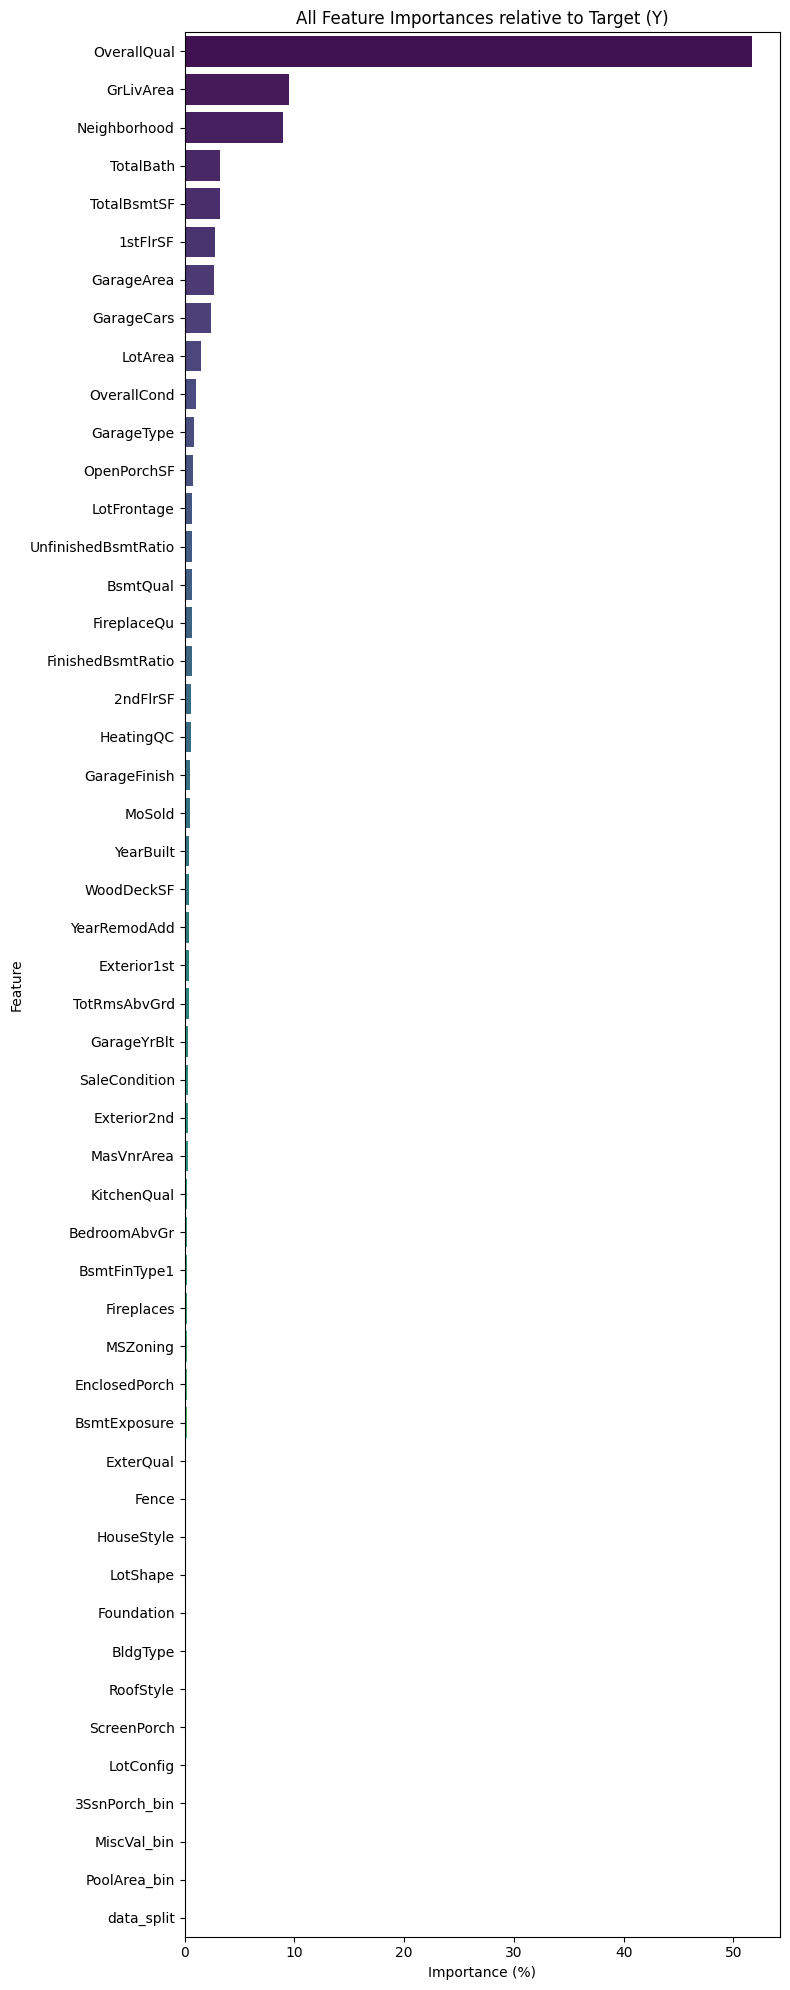

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

train_tmp = df_cleaned[df_cleaned['data_split'] == 1].copy()

# RandomForestRegressor 모델 생성 (회귀!)
model = RandomForestRegressor(random_state=42)

# SelectFromModel로 feature selection (자동 threshold 기준)
selector = SelectFromModel(model)
selector.fit(train_tmp, y_train_log)  # 이제 연속형 y OK

# 선택된 변수 이름들
selected_features = train_tmp.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

# 모든 변수의 feature importance 가져오기 (RandomForest에서 직접)
importances = selector.estimator_.feature_importances_

# DataFrame으로 정리 (모든 변수 포함)
importance_df = pd.DataFrame({
    'Feature': train_tmp.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# (선택) %로 변환
importance_df['Importance (%)'] = importance_df['Importance'] * 100

# 시각화
plt.figure(figsize=(8, len(importance_df) * 0.4))
sns.barplot(x='Importance (%)', y='Feature', data=importance_df, palette='viridis')
plt.title("All Feature Importances relative to Target (Y)", fontsize=12)
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

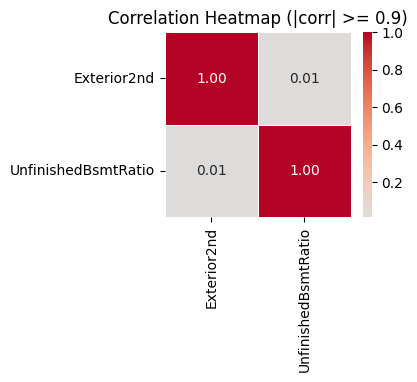

제거된 컬럼: ['Exterior2nd', 'UnfinishedBsmtRatio']


In [68]:
# 수치형 컬럼만
numeric_cols = df_cleaned.select_dtypes(include=['number'])

# 상관계수 행렬
corr_matrix = numeric_cols.corr().abs()

# 상관계수 0.9 이상 쌍 찾기 (자기자신 제외)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = set(upper.columns[upper.apply(lambda x: any(x >= 0.9))])

# 부분 상관행렬 및 히트맵
if high_corr_cols:
    sub_corr = corr_matrix.loc[list(high_corr_cols), list(high_corr_cols)]
    plt.figure(figsize=(len(high_corr_cols)*1.5, len(high_corr_cols)*1.2))
    sns.heatmap(sub_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
    plt.title('Correlation Heatmap (|corr| >= 0.9)')
    plt.show()
else:
    print("상관계수 0.9 이상인 컬럼 없음.")

# 고상관관계 컬럼 자동 제거
to_drop = [col for col in upper.columns if any(upper[col] >= 0.9)]
df_dropped = numeric_cols.drop(columns=to_drop)
print("제거된 컬럼:", to_drop)

In [69]:
df_train = df_dropped[df_dropped['data_split'] == 1].drop(['data_split', 'FinishedBsmtRatio'], axis=1).copy()
df_valid = df_dropped[df_dropped['data_split'] == 0].drop(['data_split', 'FinishedBsmtRatio'], axis=1).copy()
df_test  = df_dropped[df_dropped['data_split'] == 2].drop(['data_split', 'FinishedBsmtRatio'], axis=1).copy()

In [70]:
df_train.shape

(1095, 46)

In [71]:
y_train_log.shape

(1095,)

# Training



*   제출/평가용 실제 예측값이 필요할 때는 “역변환”
*   log로 예측한 값을 exp로 돌려놓기!
*   만약 np.log(y) 썼다면 np.exp(y_pred_log)로 역변환





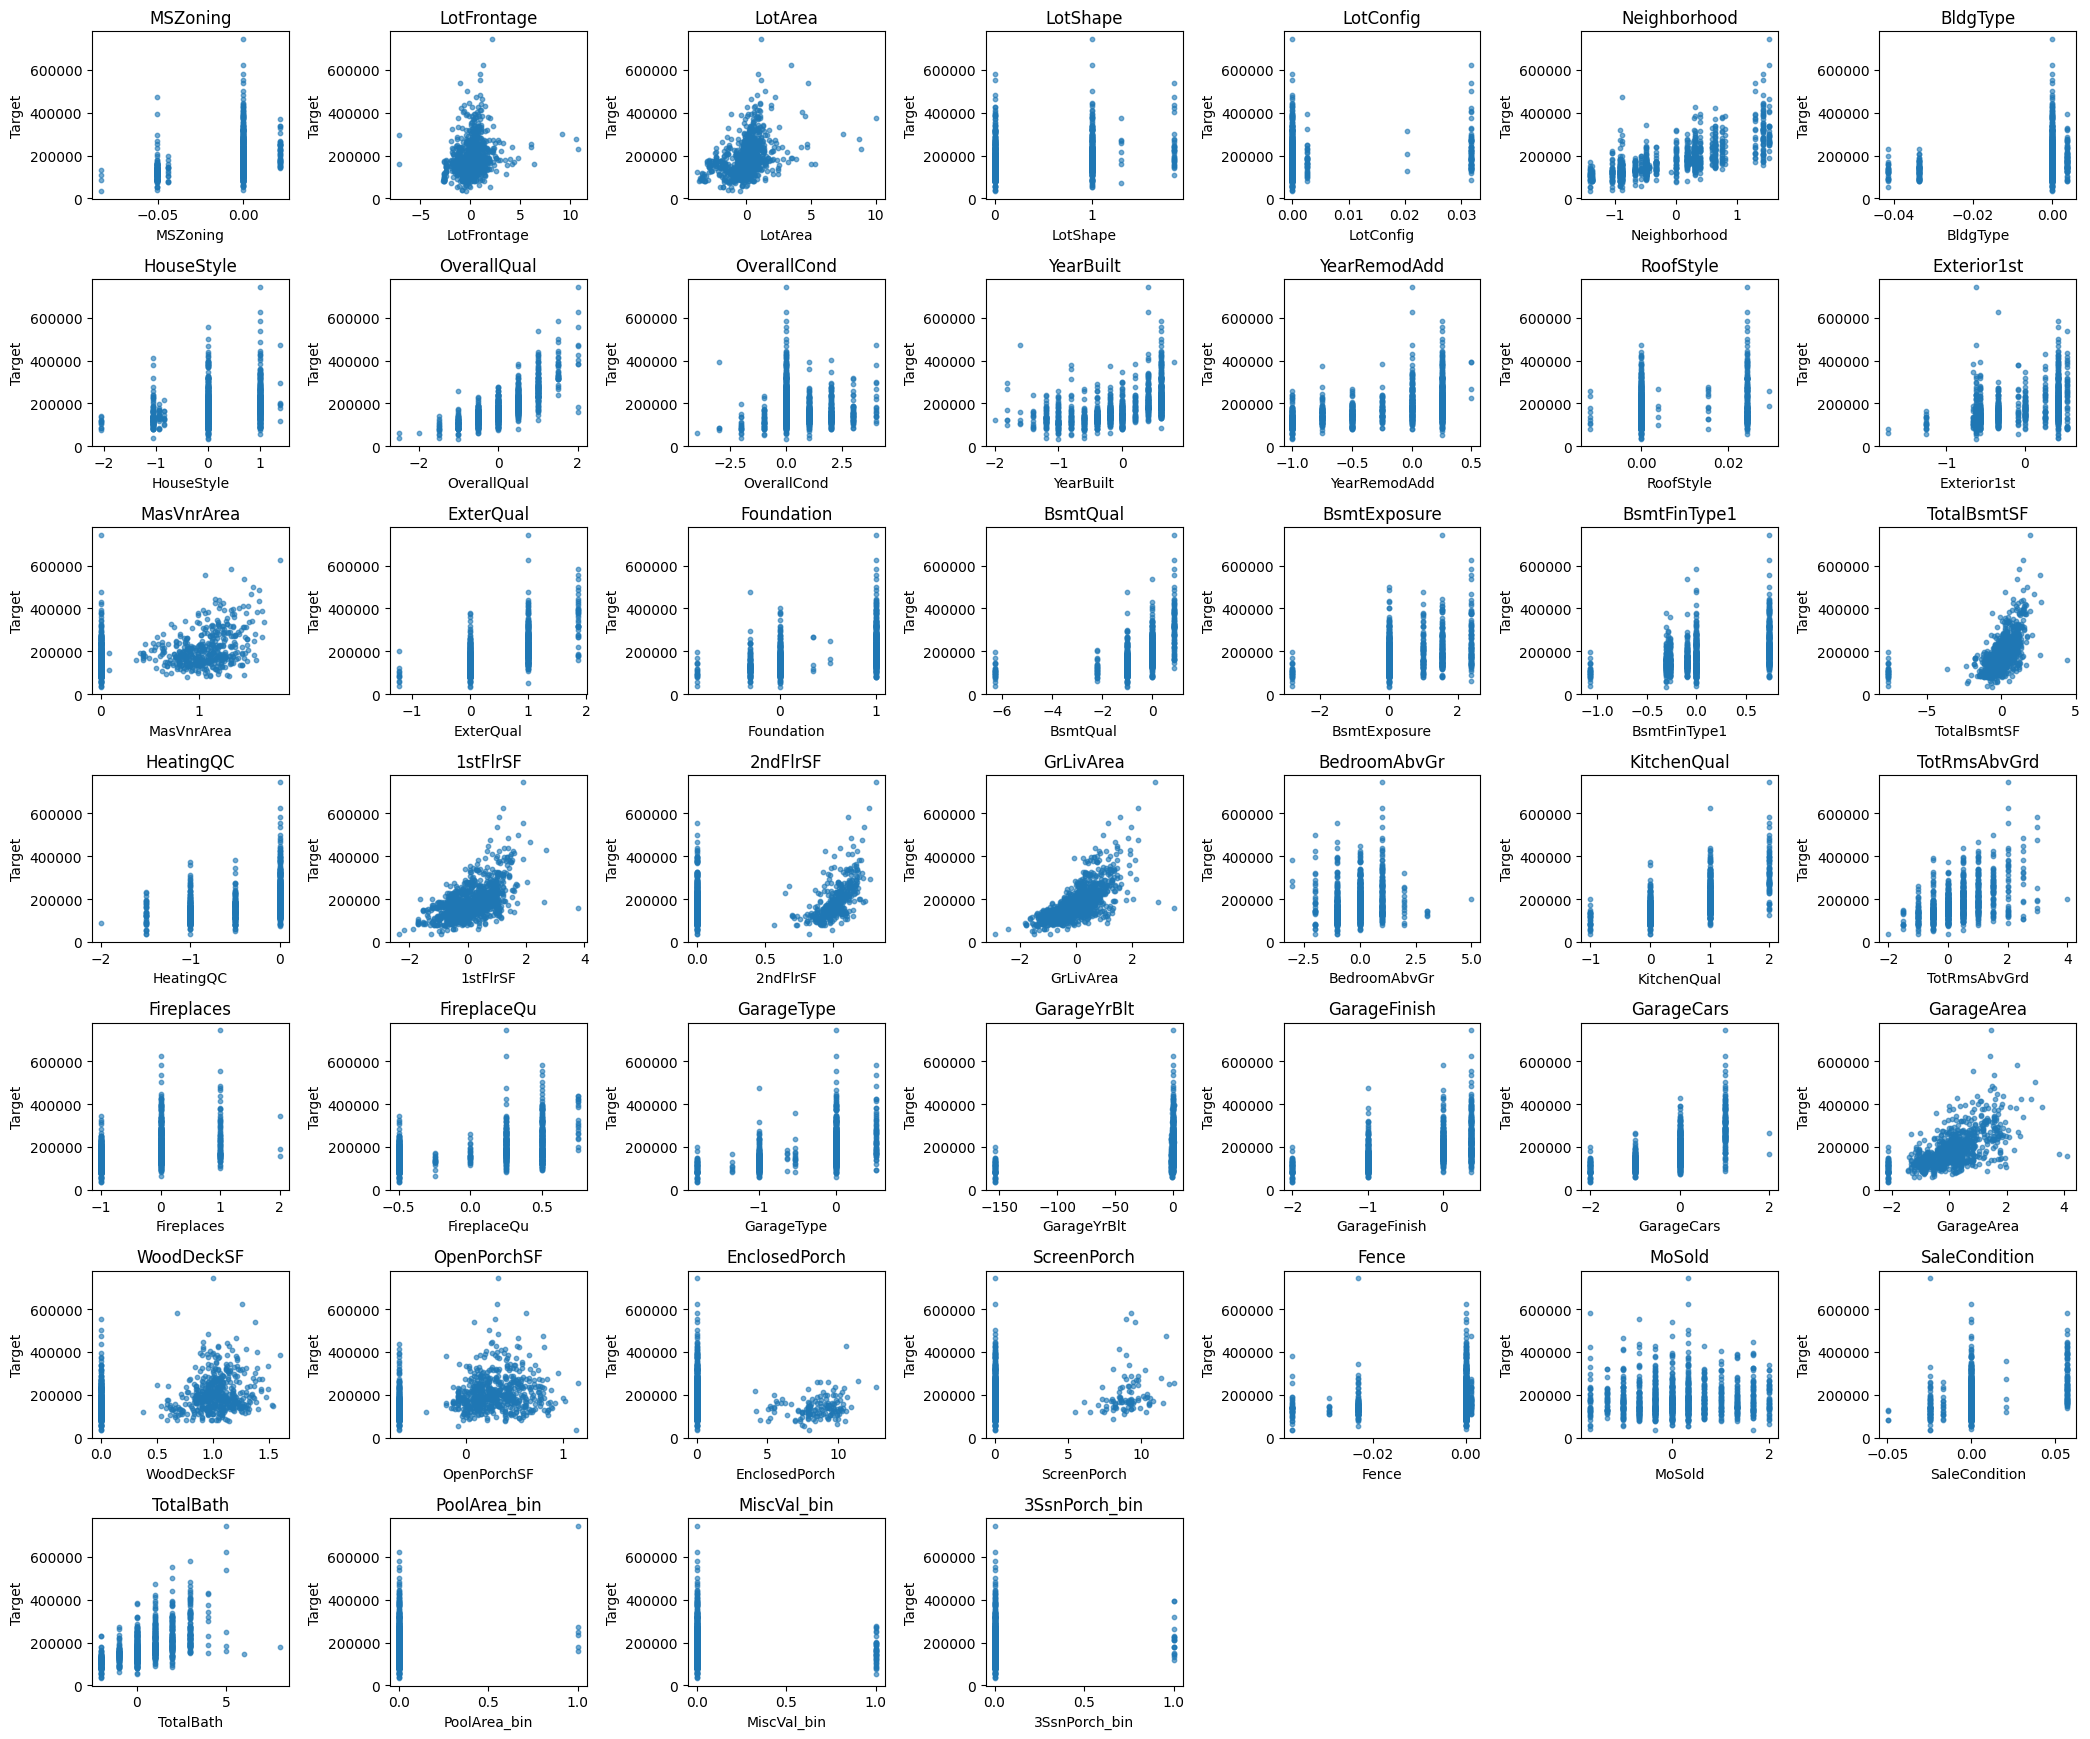

In [72]:
n_cols = 7
n_rows = (len(df_train.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*3, n_rows*2.5))
for i, col in enumerate(df_train.columns):
    plt.subplot(n_rows, n_cols, i+1)
    plt.scatter(df_train[col], y_train, s=10, alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.title(col)
plt.tight_layout()
plt.show()

In [88]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# 5. 모델 리스트 (ElasticNet, SGD 추가)
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000),
    "SGDRegressor": SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, max_iter=5000, random_state=42)
}

# 6. 학습, 예측, 평가 루프
for name, model in models.items():
    model.fit(df_train, y_train_log)
    y_pred = model.predict(df_valid)
    rmse = np.sqrt(mean_squared_error(y_valid_log, y_pred))
    r2 = r2_score(y_valid_log, y_pred)
    print(f"[{name}] RMSE: {rmse:.2f}  |  R²: {r2:.4f}")

[LinearRegression] RMSE: 0.13  |  R²: 0.9065
[Ridge] RMSE: 0.13  |  R²: 0.9034
[Lasso] RMSE: 0.25  |  R²: 0.6490
[ElasticNet] RMSE: 0.19  |  R²: 0.8005
[SGDRegressor] RMSE: 1031357556507.40  |  R²: -6142967536878258315329536.0000


In [89]:
# 예측 (로그 스케일로 출력됨)
y_test_pred_log = models["Ridge"].predict(df_test)

# 반드시 역변환!
y_test_pred = np.expm1(y_test_pred_log)

print("Test predictions (first 5):", y_test_pred[:5])

# 제출 파일 생성
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': y_test_pred
})
submission.to_csv('submission_rg.csv', index=False)

Test predictions (first 5): [120537.46700514 145754.09970274 179192.55281092 200198.3608649
 212089.95634132]


In [79]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

model2 = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42)
}

for name, model in model2.items():
    model.fit(df_train, y_train_log)
    y_pred = model.predict(df_valid)
    rmse = np.sqrt(mean_squared_error(y_valid_log, y_pred))
    r2 = r2_score(y_valid_log, y_pred)
    print(f"{name:15s} RMSE: {rmse:.2f}  |  R²: {r2:.4f}")

RandomForest    RMSE: 0.14  |  R²: 0.8907
GradientBoosting RMSE: 0.13  |  R²: 0.9091
AdaBoost        RMSE: 0.17  |  R²: 0.8361
XGBoost         RMSE: 0.14  |  R²: 0.8887
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2234
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 44
[LightGBM] [Info] Start training from score 12.031055
LightGBM        RMSE: 0.14  |  R²: 0.8906


In [80]:
# 예측 (로그 스케일로 출력됨)
y_test_pred_log = model2["GradientBoosting"].predict(df_test)

# 반드시 역변환!
y_test_pred = np.expm1(y_test_pred_log)

print("Test predictions (first 5):", y_test_pred[:5])

# 제출 파일 생성
submission = pd.DataFrame({
    'Id': test_id,
    'SalePrice': y_test_pred
})
submission.to_csv('submission_gb.csv', index=False)

Test predictions (first 5): [122547.76610231 154710.45096092 178937.38254883 189040.12692027
 196206.86365923]


In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 (적당히 좁게 잡았으니 더 넓게도 가능)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.15, 0.2],
    'subsample': [0.8, 1.0]
}

gbm = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    gbm,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(df_train, y_train_log)

print("Best params:", grid_search.best_params_)
print("Best RMSE (CV):", -grid_search.best_score_)
# 예측 및 평가
y_pred_gbm = grid_search.predict(df_valid)
r2 = r2_score(y_valid_log, y_pred)
print(f"GradientBoosting 튜닝 후 검증 RMSE: {rmse:.2f} | R²: {r2:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE (CV): 0.1315554088806443
GradientBoosting 튜닝 후 검증 RMSE: 0.14 | R²: 0.8906


StackingRegressor의 base_models는
새로(다시) 학습하는 것이 원칙이고,
기존에 fit된 모델 객체를 넣으면 안 된다!!!

In [82]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 기본 모델 리스트 (원하는 대로 변경 가능)
base_models = [
    ('ridge', Ridge(alpha=1.0, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]

final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    n_jobs=-1,
    passthrough=False  # True로 두면 원본 feature도 같이 사용
)
stacking.fit(df_train, y_train_log)
y_pred_stack = stacking.predict(df_valid)

rmse_stack = np.sqrt(mean_squared_error(y_valid_log, y_pred_stack))
r2_stack = r2_score(y_valid_log, y_pred_stack)
print(f"Stacking RMSE: {rmse_stack:.2f} | R²: {r2_stack:.4f}")

Stacking RMSE: 0.14 | R²: 0.8841


In [83]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=100, random_state=42))
]

voting = VotingRegressor(estimators=models, n_jobs=-1)
voting.fit(df_train, y_train_log)
y_pred = voting.predict(df_valid)

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_valid_log, y_pred))
r2 = r2_score(y_valid_log, y_pred)
print(f"VotingRegressor RMSE: {rmse:.2f} | R²: {r2:.4f}")

VotingRegressor RMSE: 0.12 | R²: 0.9129


In [84]:
y_test_pred_log = voting.predict(df_test)
y_test_pred = np.expm1(y_test_pred_log)  # log1p를 썼으니 expm1로 역변환

submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_test_pred
})
submission.to_csv("submission_vt.csv", index=False)

In [85]:
y_test_pred_log = stacking.predict(df_test)
y_test_pred = np.expm1(y_test_pred_log)  # log1p를 썼으니 expm1로 역변환

submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_test_pred
})
submission.to_csv("submission_sk.csv", index=False)

In [86]:
y_test_pred_log = grid_search.predict(df_test)
y_test_pred = np.expm1(y_test_pred_log)  # log1p를 썼으니 expm1로 역변환

submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_test_pred
})
submission.to_csv("submission_gs.csv", index=False)